<a href="https://colab.research.google.com/github/chaitanya-949/hawkeye/blob/main/bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - bike-sharing-demand-prediction






##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual


# **Project Summary -**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **GitHub Link -**

https://github.com/chaitanya-949/hawkeye

# **Problem Statement**


*Data Description*
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

Date : year-month-day.

Rented Bike count - Count of bikes rented at each hour.

Hour - Hour of he day.

Temperature-Temperature in Celsius.

Humidity - %.

Windspeed - m/.

Visibility - 10m.

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import missingno as msno

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing, metrics, feature_selection, model_selection # Import key modules from sklearn
from sklearn.linear_model import LinearRegression # Import the Linear Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, auc
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/MyDrive/SeoulBikeData.csv'
df=pd.read_csv(file_path,encoding= 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

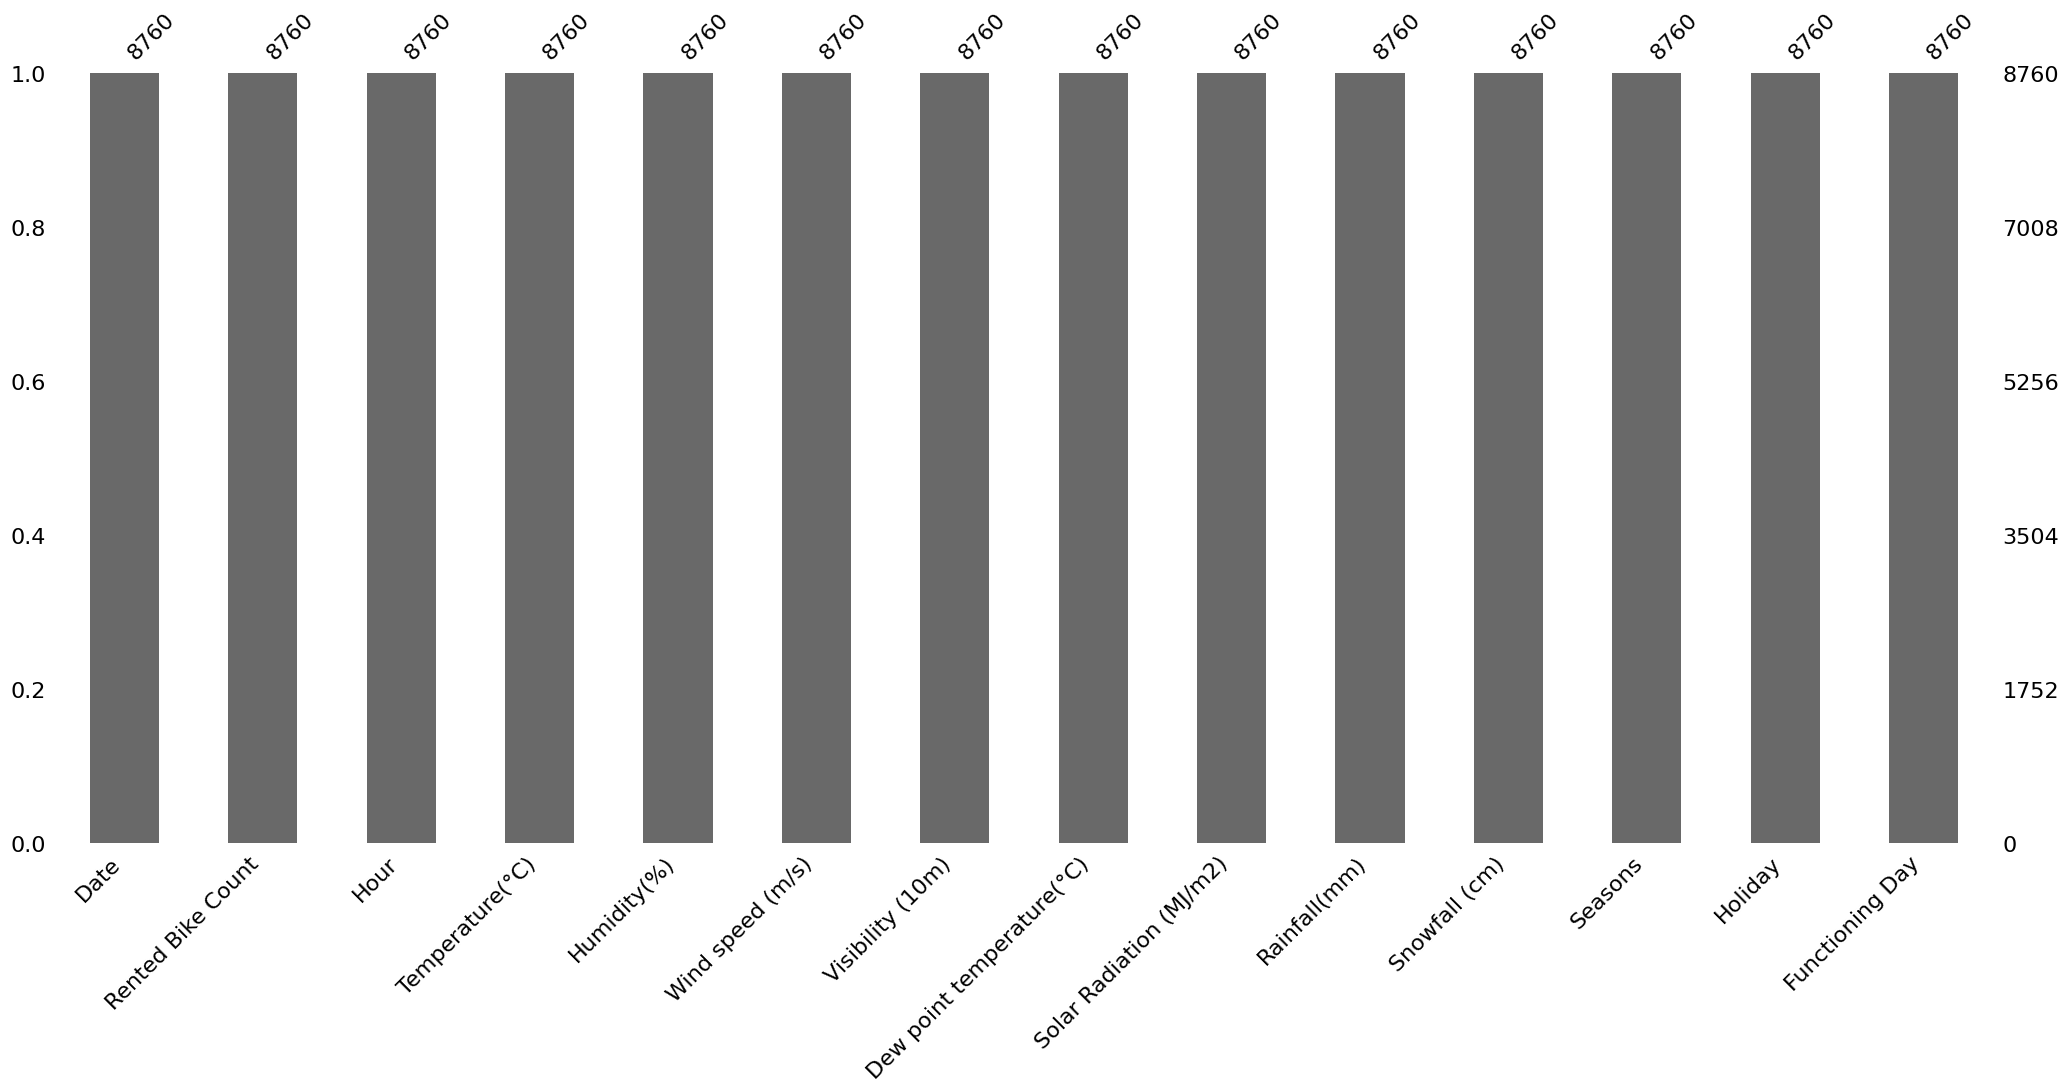

In [ ]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

By seeing into the Data I came to know that it is consisted of[8760 rows x 14 columns] and there are no duplicate and missing values

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

There are a total 14 variables the above showing descriptive summary of numeric columns

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  a=df[i].unique()
  print(f'{i}={a}')

Date=['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018'
 '14/

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#changing the date format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Write your code to make your dataset analysis read
#making different columns for day,month,year
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day
df['dayofweek']= pd.to_datetime(df['Date']).dt.dayofweek

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
#Dropping the date column because we already divided into parts
df=df.drop(['Date'], axis=1)

### What all manipulations have you done and insights you found?

I changed the date column into day,month,year column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

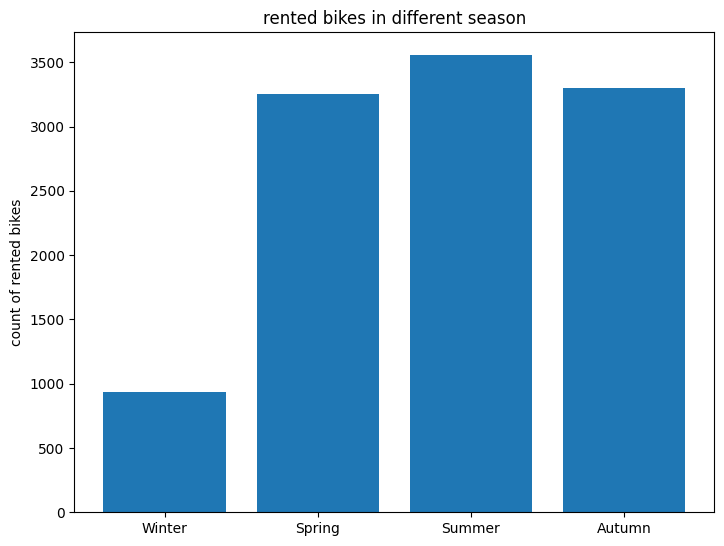

In [ ]:
# Chart - 1 visualization code
#seeing relation between dependent variable and the categorical variables
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season=df['Seasons']
rentedbike=df['Rented Bike Count']
ax.set_ylabel('count of rented bikes')
ax.set_title('rented bikes in different season')
ax.bar(season,rentedbike)
plt.show()


##### 1. Why did you pick the specific chart?

I picked bar chart to see the realtion between dependent variable and the categorical variables.

##### 2. What is/are the insight(s) found from the chart?


I found that the rate of bookings are higher in summer season and lower  in winter season

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

because of cold weather in winter many customers avoid travelling

#### Chart - 2

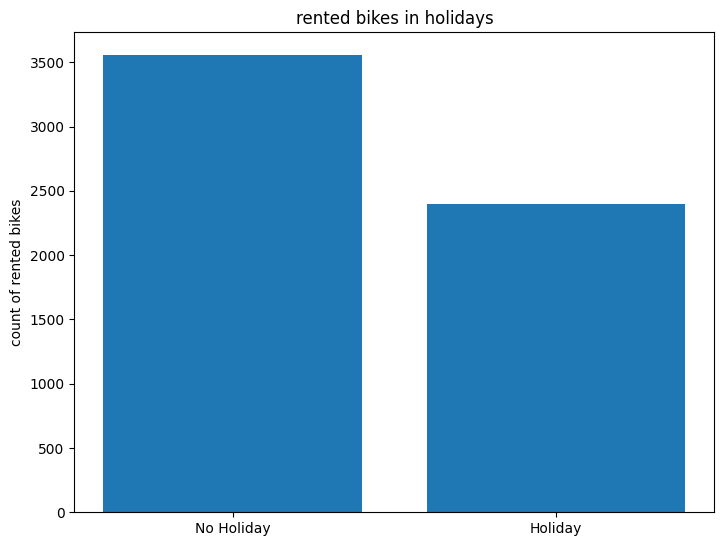

In [ ]:
# Chart - 2 visualization code
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
holiday=df['Holiday']
rentedbike=df['Rented Bike Count']
ax.set_ylabel('count of rented bikes')
ax.set_title('rented bikes in holidays')
ax.bar(holiday,rentedbike)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

people often travel on the working days rather than a holiday in rented bikes

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3

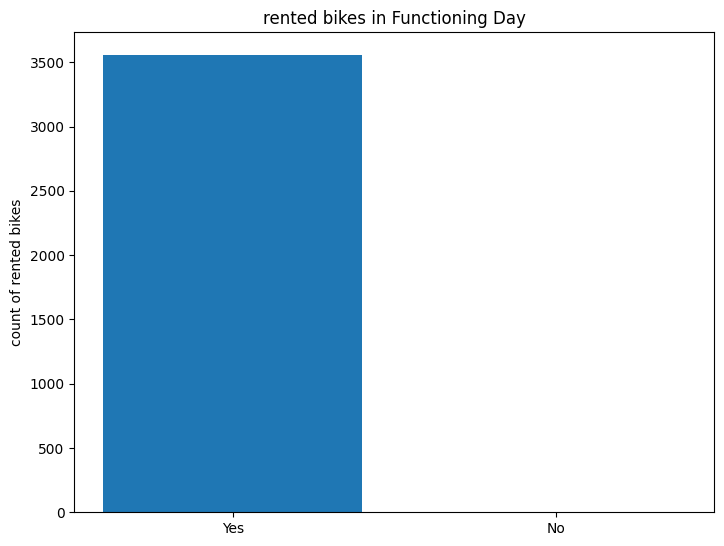

In [ ]:
# Chart - 3 visualization code
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
functionday=df['Functioning Day']
rentedbike=df['Rented Bike Count']
ax.set_ylabel('count of rented bikes')
ax.set_title('rented bikes in Functioning Day')
ax.bar(functionday,rentedbike)
plt.show()

In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

##### 1. Why did you pick the specific chart?

to check the booking on functioning day and a normal day

##### 2. What is/are the insight(s) found from the chart?

i came to know that a low no of bookings done on non functioning day only 295

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
#splitting the numeric columns
numeric_variables=df.select_dtypes(exclude='object')
numeric_variables

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  year  month  day  dayofweek  
0              0.0            0.0  2017      1   12          3  
1              0.0            0.0  2017      1   12          3  
2              0.0            0.0  2017      1   12          3  
3              0.0            0.0  2017      1   12          3  
4              0.0            0.0  2017      1   12          3  
...            ...            ...   ...    ...  ...        ...  
8755           0.0            0.0  2018     11   30          4  
8756           0.0            0.0  2018     11   30          4  
8757           0.0            0.0  2018     11   30          4  
8758           0.0            0.0  2018     11   30          4  
8759           0.0            0.0  2018     11   30          4  

[8760 rows x 14 columns]

In [ ]:
for col in numeric_variables[:]:
  print(col)

Rented Bike Count
Hour
Temperature(°C)
Humidity(%)
Wind speed (m/s)
Visibility (10m)
Dew point temperature(°C)
Solar Radiation (MJ/m2)
Rainfall(mm)
Snowfall (cm)
year
month
day
dayofweek


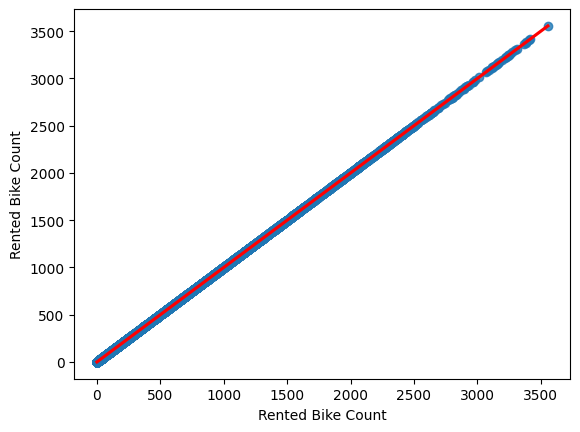

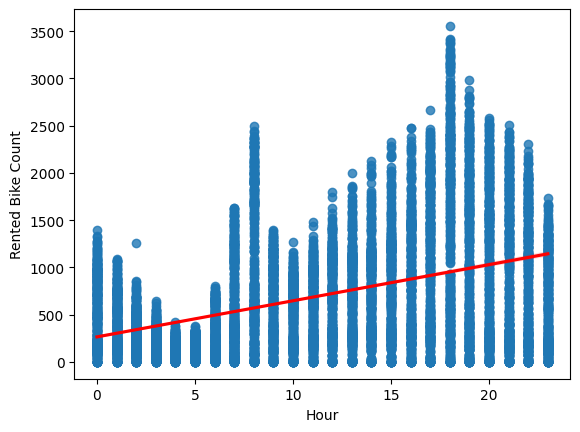

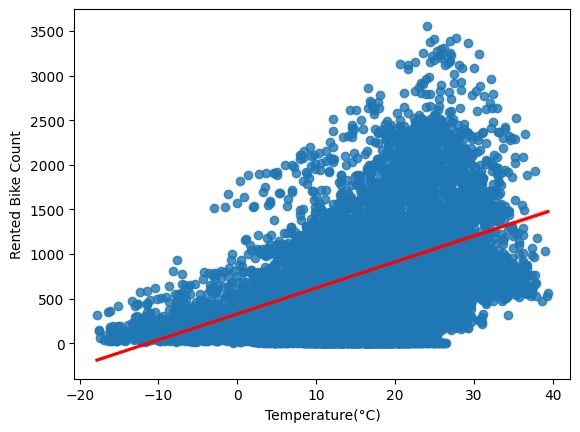

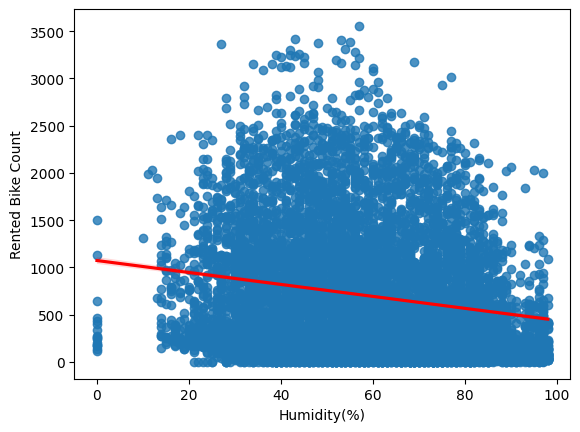

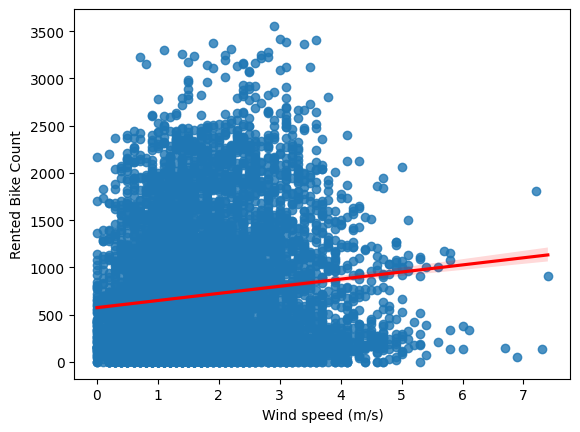

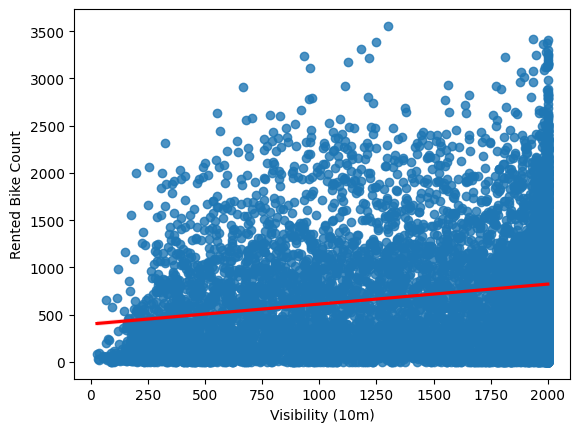

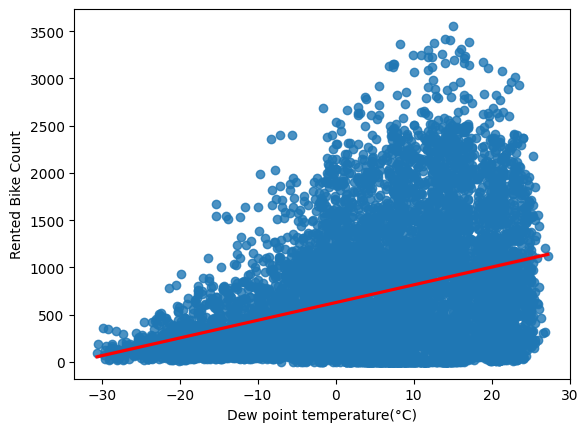

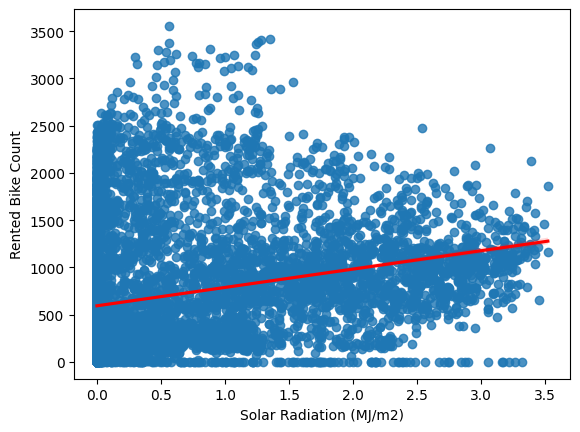

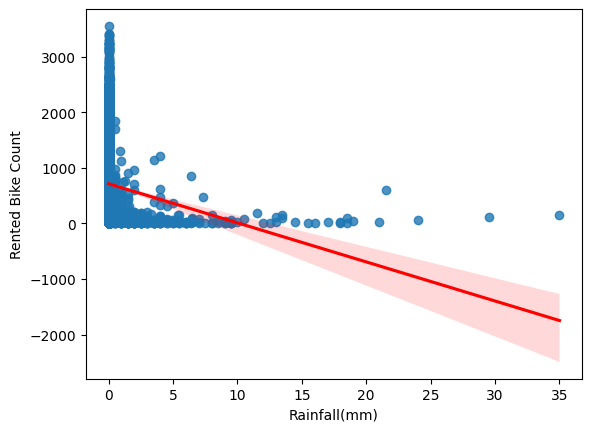

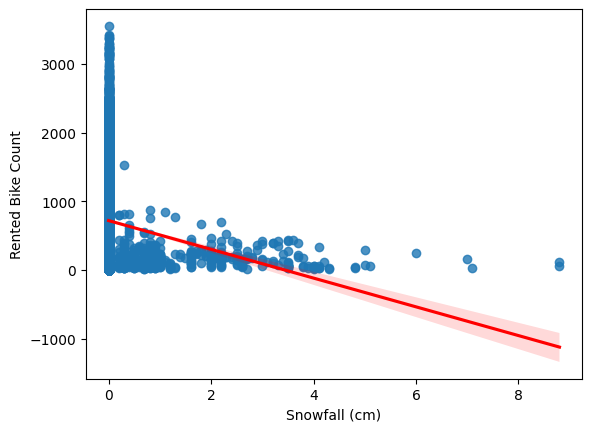

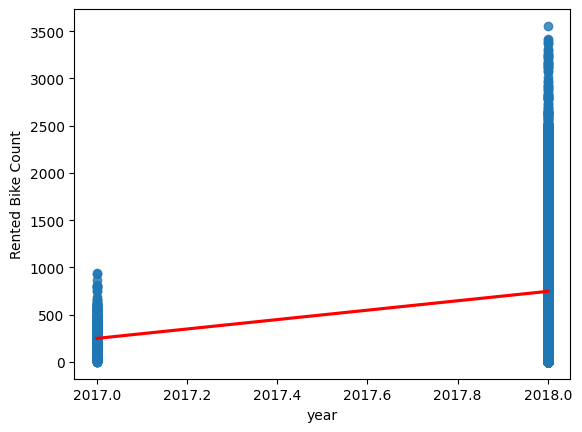

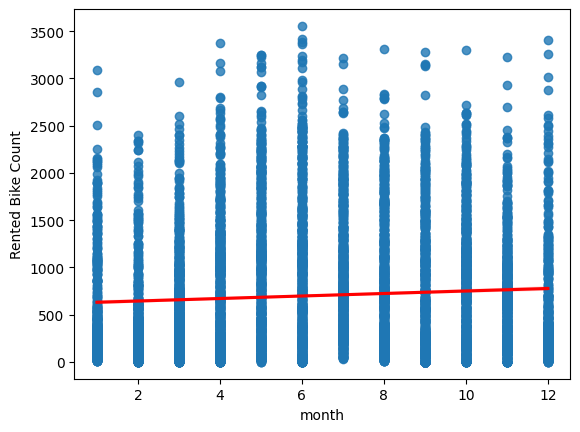

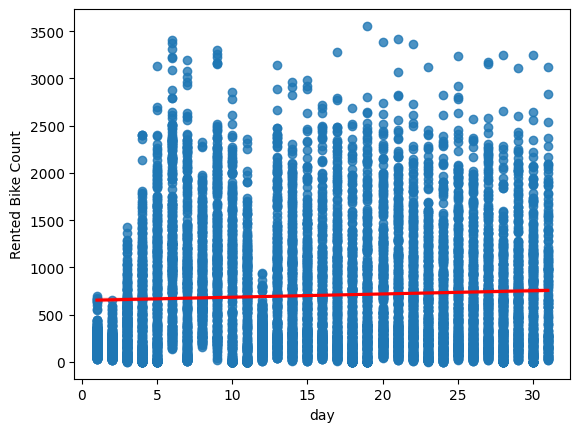

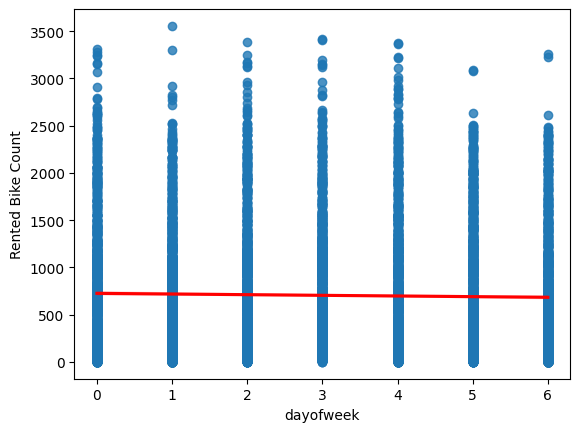

In [ ]:
# Chart - 5 visualization code
#visualizing the  numeric variables using regplot in relation with dependent variables
for col in numeric_variables[:]:
  sns.regplot(x=df[col], y=df['Rented Bike Count'],data=df, line_kws={"color":"r"})

  plt.show()

##### 1. Why did you pick the specific chart?

to know the relation between dependent variable and independent variables

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#line plot for Hours vs bike rented count
fig = px.line( x = df['Hour'],y =df['Rented Bike Count'],title = 'Hours vs bike rented count')
fig.show()

##### 1. Why did you pick the specific chart?

to check at what time the bookings are more in number

##### 2. What is/are the insight(s) found from the chart?

The booking are high at early morning that is from 7:00am to 9:00 am and in the evening from 5:00pm to 9:00pm

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

i think people at that time will go to offices and colleges so the bookings are higher

#### Chart - 7

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

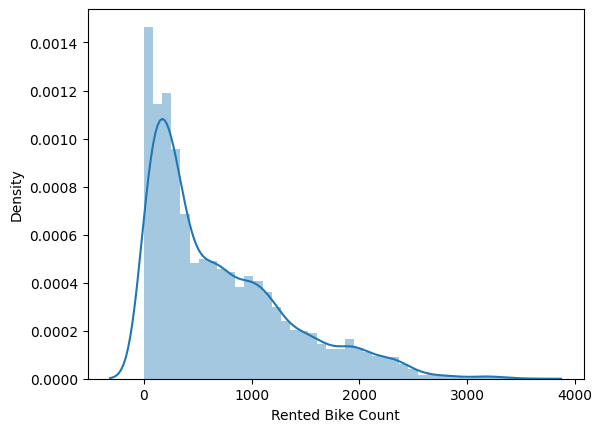

In [ ]:
# Chart - 7 visualization code
#seeing how the data of dependent variable is distributed
sns.distplot(df['Rented Bike Count'])

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

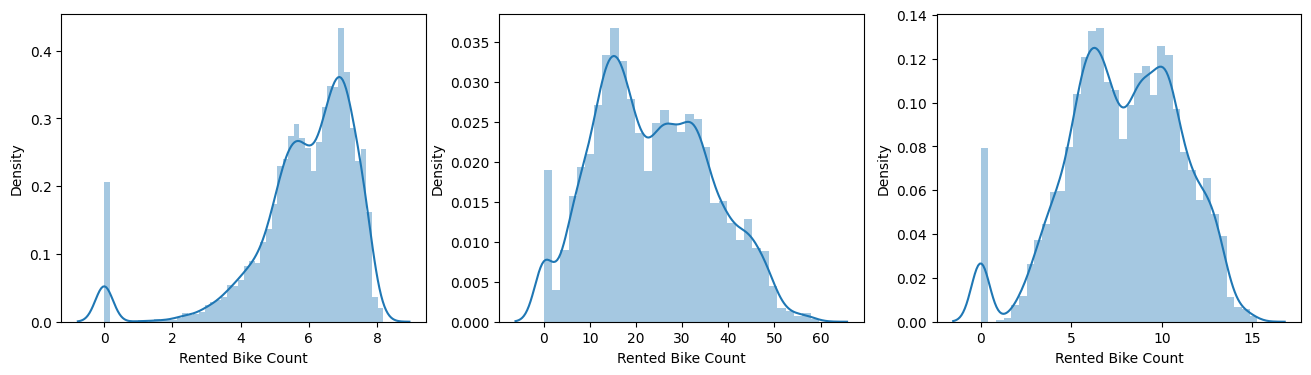

In [ ]:
# checking the best transformation for our target variable
fig, axs = plt.subplots(1,3, figsize=(16,4))

sns.distplot(np.log1p(df['Rented Bike Count']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(df['Rented Bike Count']),kde=True, ax=axs[1])
sns.distplot(np.cbrt(df['Rented Bike Count']),kde=True, ax=axs[2])

##### 1. Why did you pick the specific chart?

for linear regression  assumption is that the data should be normal distribution so i checked it and then i transformed using transformation techniques

##### 2. What is/are the insight(s) found from the chart?

The target variable is left skewed so i applied transformation techniques in that square root transformation gave good result

#### Chart - 14 - Correlation Heatmap

<Axes: >

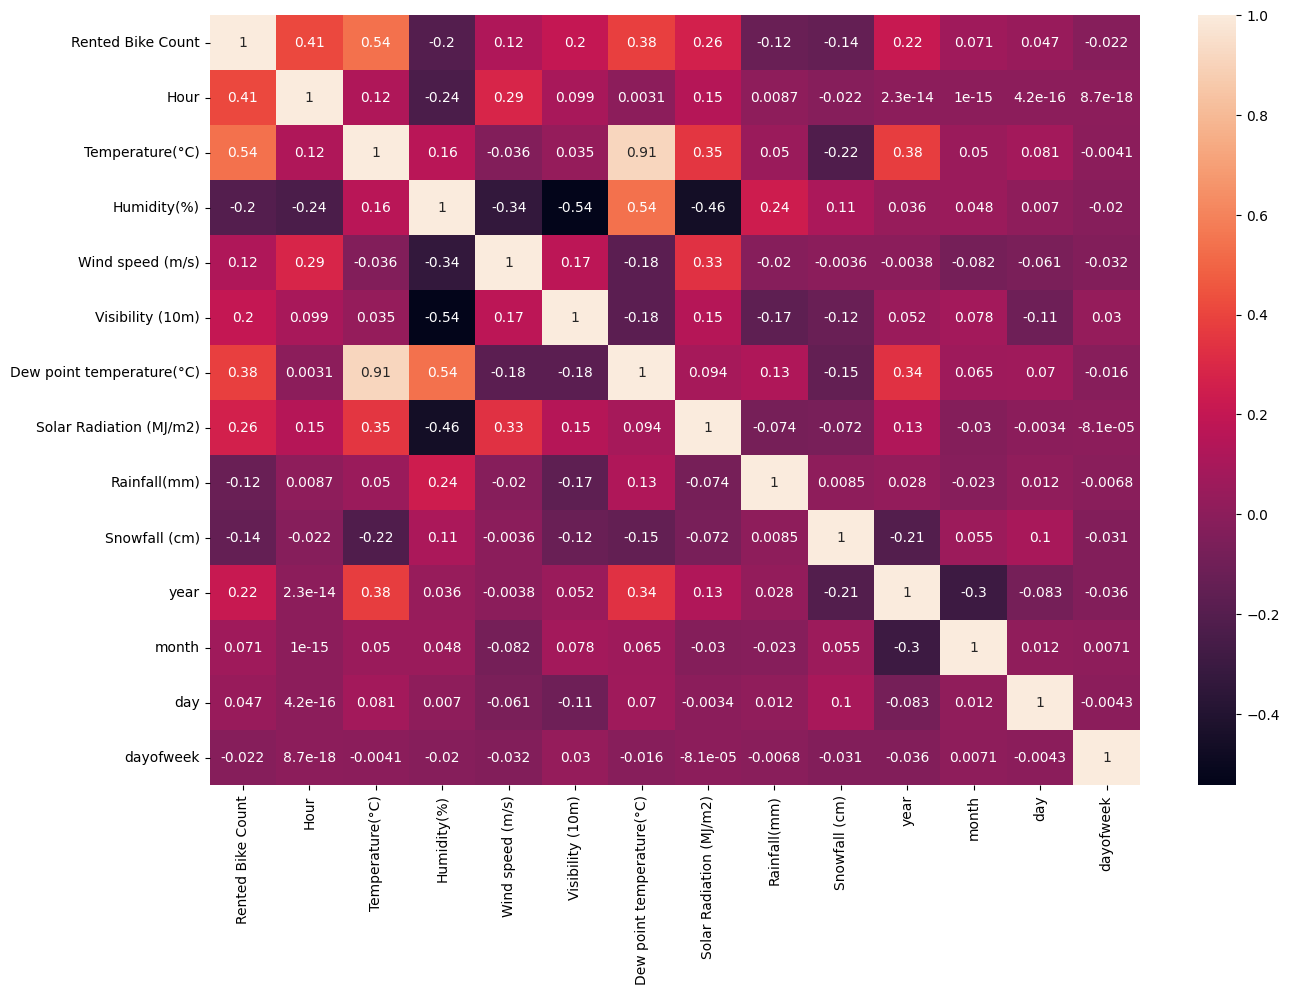

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True)

In [ ]:
#calculating variation inflation factor for variables
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables        VIF
0                      Hour   4.448484
1           Temperature(°C)   3.598967
2               Humidity(%)  23.819097
3          Wind speed (m/s)   4.848452
4          Visibility (10m)  10.638740
5   Solar Radiation (MJ/m2)   2.770362
6              Rainfall(mm)   1.090006
7             Snowfall (cm)   1.148415
8                      year  65.890095
9                     month   4.720752
10                      day   4.419903
11                dayofweek   3.294603

In [ ]:
#dropping the unwanted and highly correlated variables
df=df.drop(['Dew point temperature(°C)','year'],axis=1)

<Axes: >

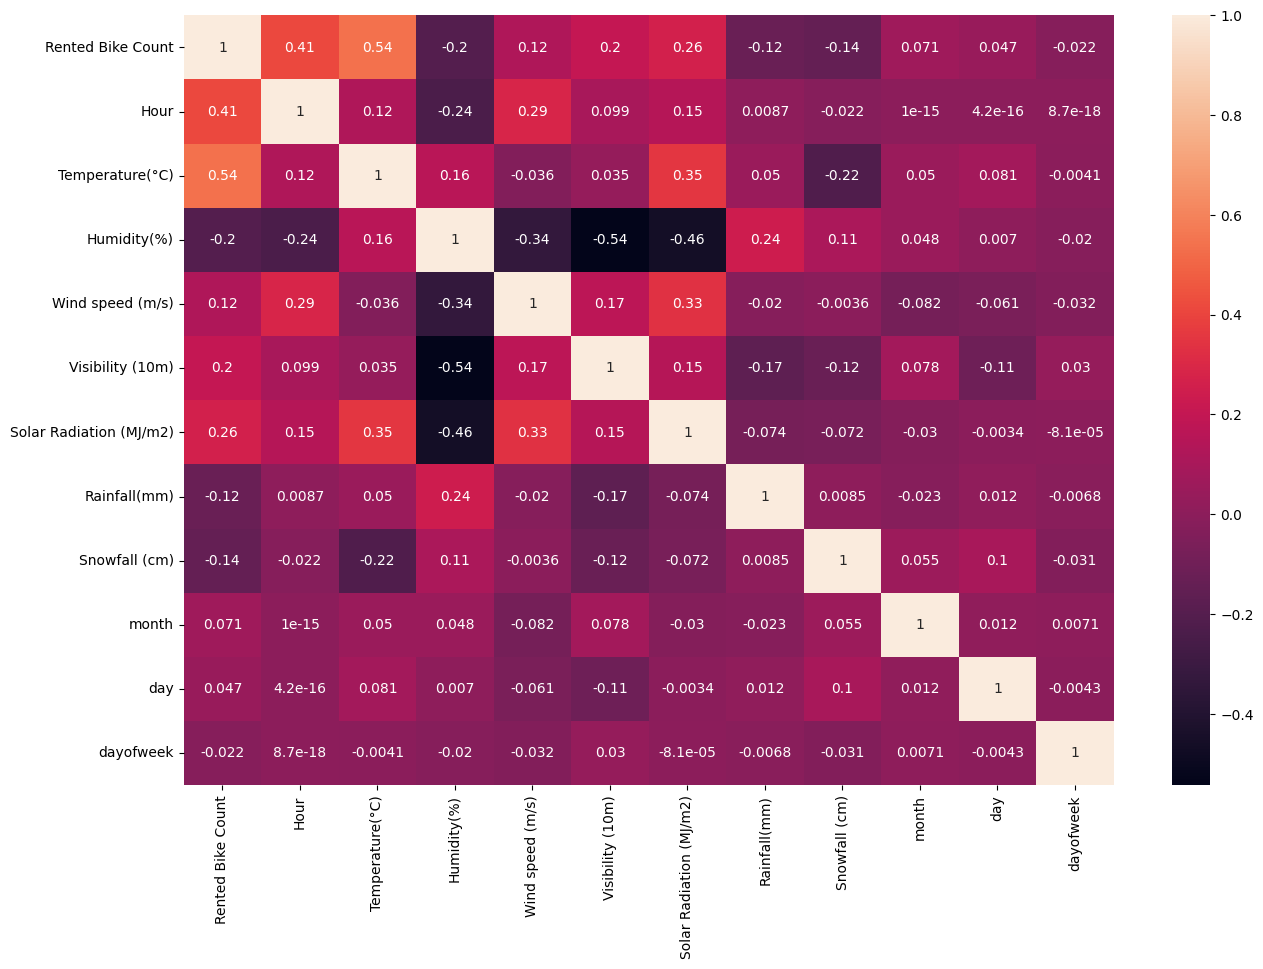

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True)

##### 1. Why did you pick the specific chart?

correlation to check the collinearity between the variables

##### 2. What is/are the insight(s) found from the chart?

Checked correlation heatmap I saw dewpoint and Temperature are highly correlated so dropped dew point than i checked variance inflation factor in that year is giving a high vif so i removed that column

#### Chart - 15 - Pair Plot

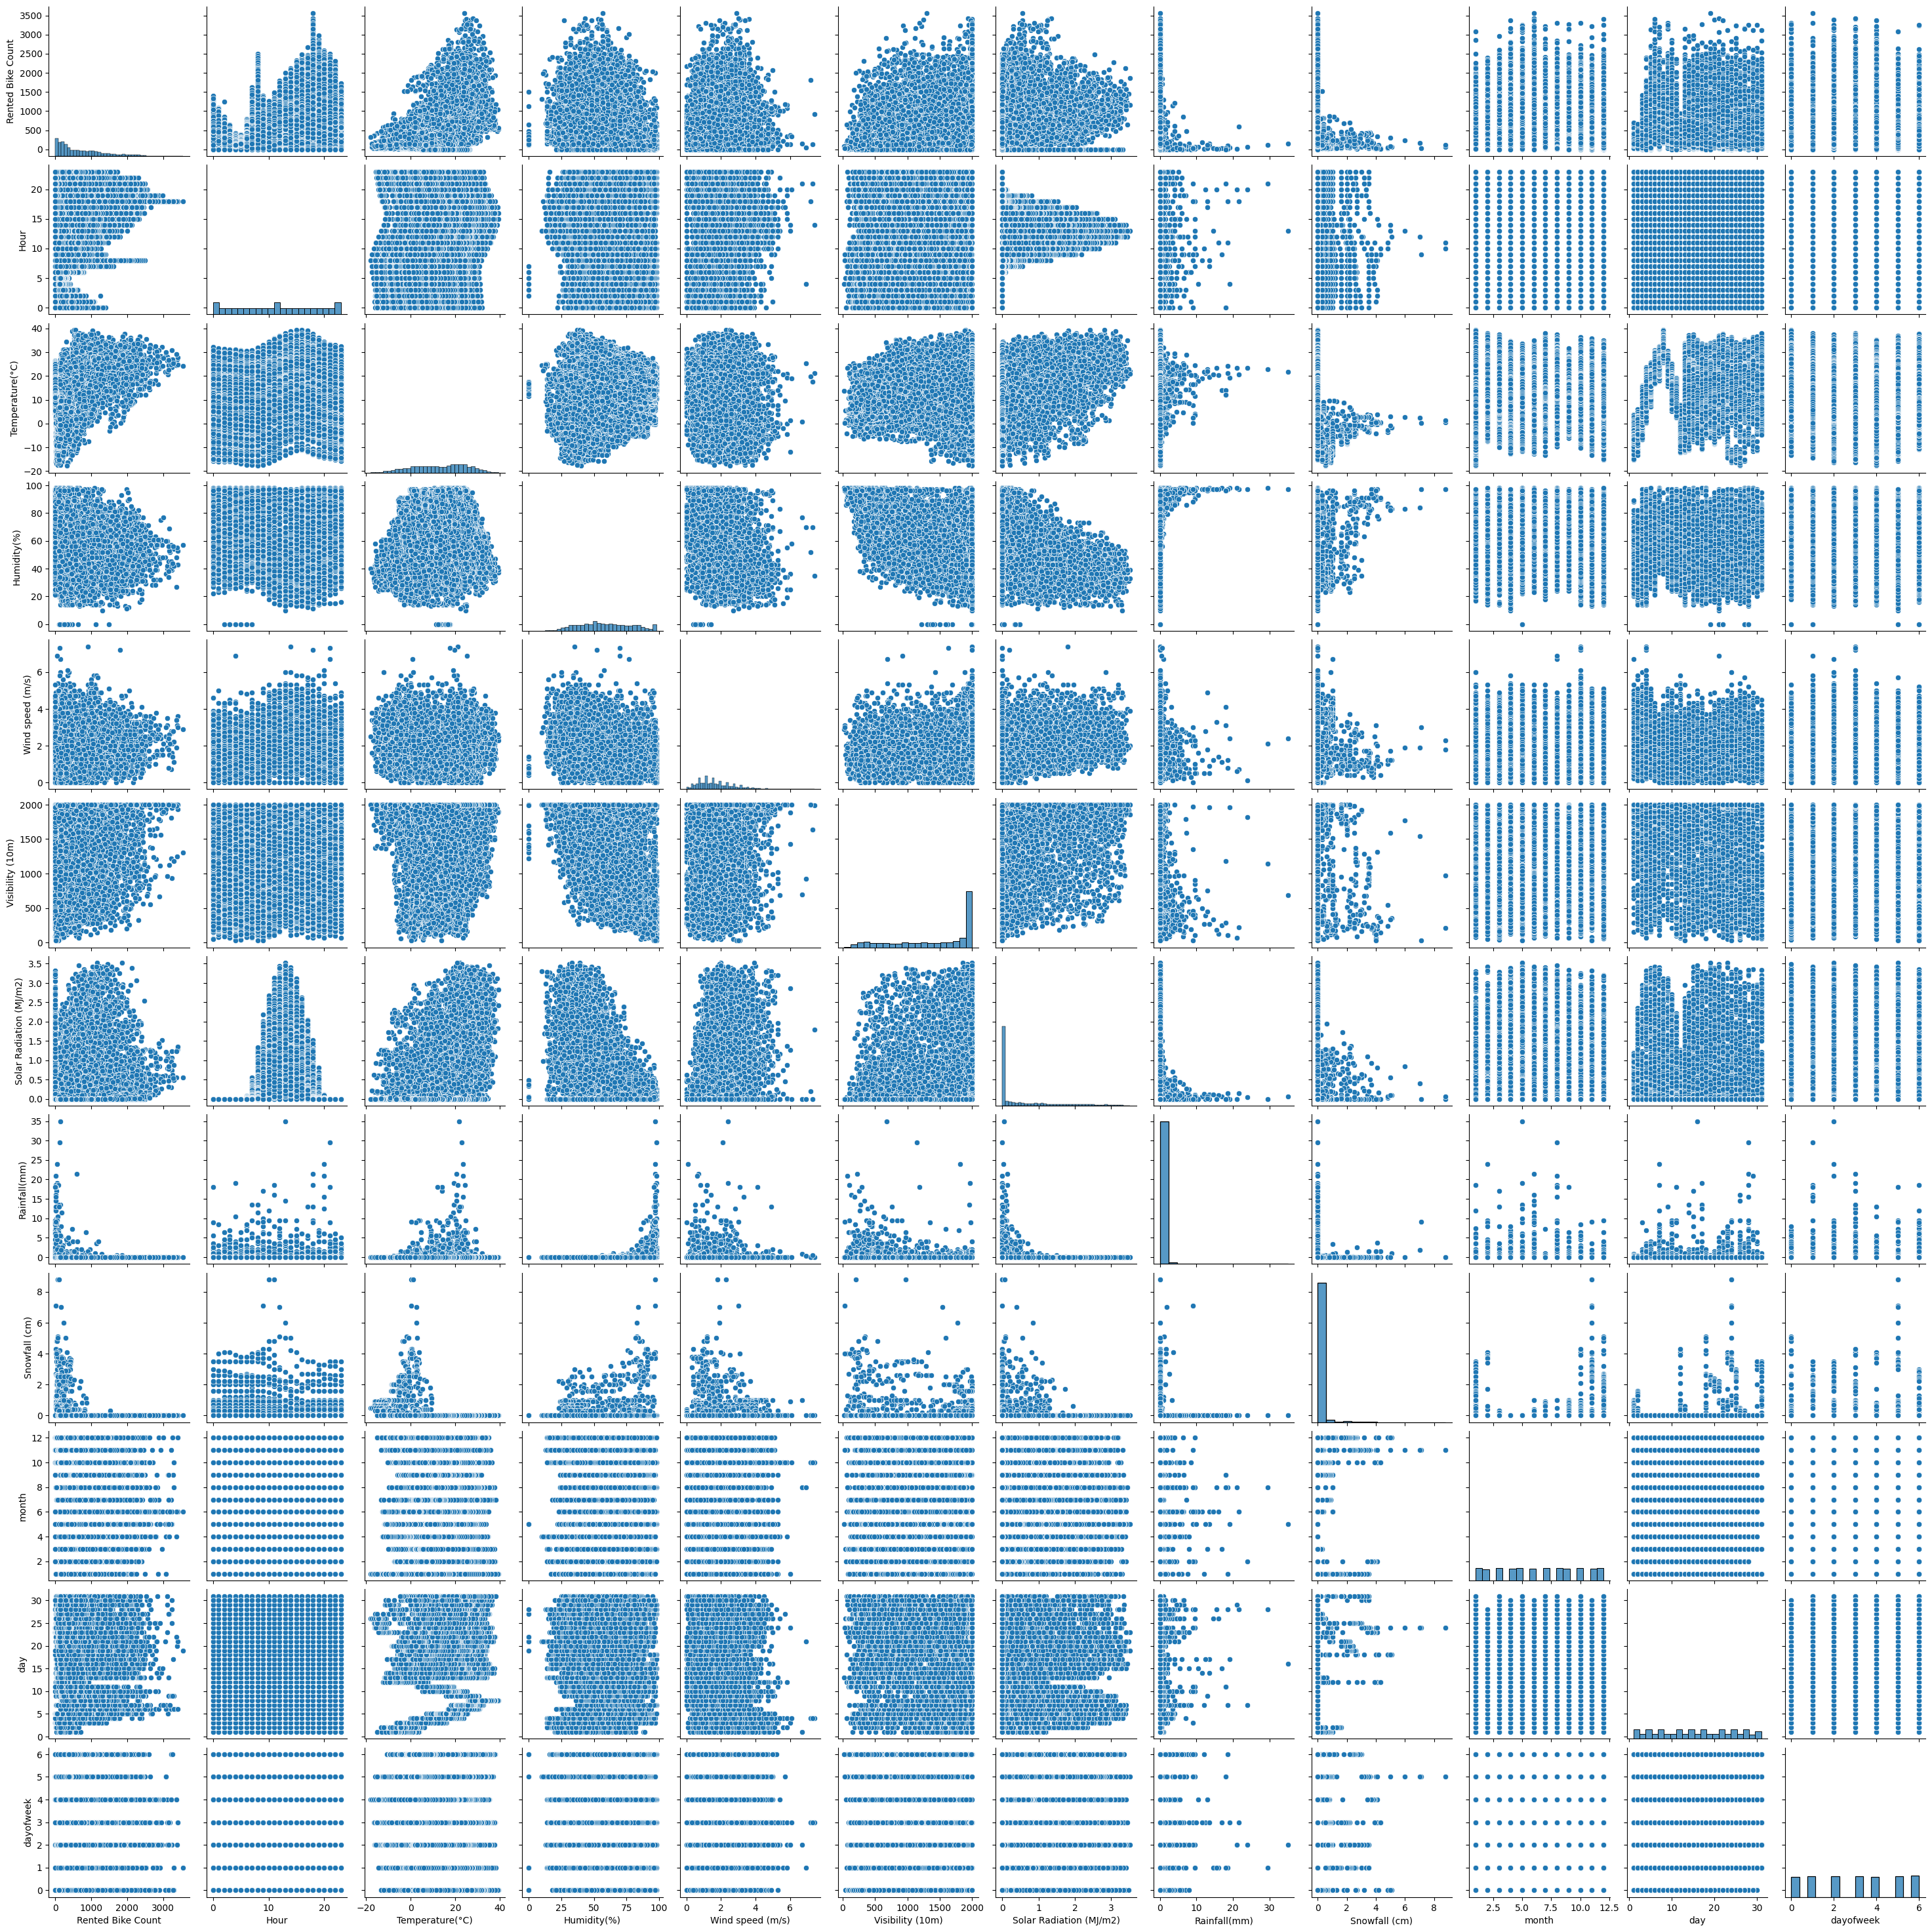

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

## ***6. Feature Engineering & Data Pre-processing***

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns


In [ ]:
final_df = pd.get_dummies(data=df, columns = ['Seasons', 'Holiday','Functioning Day'])
final_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   month  day  dayofweek  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0      1   12          3               0               0               0   
1      1   12          3               0               0               0   
2      1   12          3               0               0               0   
3      1   12          3               0               0               0   
4      1   12          3               0               0               0   

   Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
0               1                0                   1                   0   
1               1                0                   1                   0   
2               1                0                   1                   0   
3               1                0                   1                   0   
4               1                0                   1                   0   

   Functioning Day_Yes  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

#### What all categorical encoding techniques have you used & why did you use those techniques?

i used one hot encoding to all the categorical variables

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new featuresdependent_variable = 'Profit'
dependent_variable = np.sqrt(df['Rented Bike Count'])

In [ ]:
independent_variables = list(set(final_df.columns.tolist()) - {'Rented Bike Count'})
independent_variables

['Wind speed (m/s)',
 'Humidity(%)',
 'Temperature(°C)',
 'Seasons_Summer',
 'Functioning Day_Yes',
 'Solar Radiation (MJ/m2)',
 'day',
 'Visibility (10m)',
 'Rainfall(mm)',
 'dayofweek',
 'Holiday_Holiday',
 'Holiday_No Holiday',
 'Seasons_Winter',
 'Seasons_Spring',
 'Hour',
 'month',
 'Functioning Day_No',
 'Snowfall (cm)',
 'Seasons_Autumn']

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Create the data of independent variables
X = final_df[independent_variables].values

# Create the dependent variable data
y = np.sqrt(df['Rented Bike Count']).values

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### What data splitting ratio have you used and why?

i have splitted into 80:20 ratio that is training 80 and testing 20

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation of linear regression

# Fit the Algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the model


LinearRegression()

In [ ]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([17.86226118, 36.09794393, 33.27804035, ..., 29.1500795 ,
       18.34194561, 22.7016034 ])

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([18.05225475, 24.95369617, 18.49430458, ..., 14.56973098,
       32.5671173 , 20.51473657])

In [ ]:
#trained data r2
r2_score(y_train, y_pred_train)

0.6527765844128129

In [ ]:
#tested data r2
r2_score(y_test, y_pred)

0.653717728193994

In [ ]:
mean_squared_error(y_test, y_pred)

54.53469891362764

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

7.320387557094116

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

7.384761263143694

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:' , r2_score(y_test,y_pred))
print('trained r2:',r2_score(y_train, y_pred_train))

Mean Absolute Error: 5.7135227078889095
Mean Squared Error: 54.53469891362764
Root Mean Squared Error: 7.384761263143694
r2: 0.653717728193994
trained r2: 0.6527765844128129


In [ ]:
#applying ridge regression
ridge = Ridge(alpha=0.0001 , max_iter= 3000)

ridge.fit(X_train, y_train)

Ridge(alpha=0.0001, max_iter=3000)

In [ ]:
y_pred_train =ridge.predict(X_train)
y_pred_train

array([17.86226111, 36.09794393, 33.27804028, ..., 29.15007983,
       18.34194567, 22.70160355])

In [ ]:
y_pred = ridge.predict(X_test)
y_pred

array([18.05225489, 24.95369597, 18.49430442, ..., 14.56973126,
       32.5671173 , 20.51473662])

In [ ]:
#trained data r2
r2_score(y_train, y_pred_train)

0.6527765844128127

In [ ]:
#tested data r2
r2_score(y_test, y_pred)

0.6537177277163497

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:' , r2_score(y_test,y_pred))
print('trained r2:',r2_score(y_train, y_pred_train))

Mean Absolute Error: 5.713522717198201
Mean Squared Error: 54.534698988850046
Root Mean Squared Error: 7.384761268236777
r2: 0.6537177277163497
trained r2: 0.6527765844128127


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# finding the best parameters for  by gridsearchcv
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)


# Fit the Algorithm

# Predict on the model


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)


The best fit alpha value is found out to be : {'alpha': 10}


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

after gridsearchcv best fit alpha value is found out to be : {'alpha': 10}

### ML Model - 2

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
y_pred_train = lasso.predict(X_train)
y_pred_train

array([17.86301721, 36.09811773, 33.27803409, ..., 29.15137129,
       18.34150557, 22.70186287])

In [ ]:
y_pred = lasso.predict(X_test)
y_pred

array([18.05227001, 24.95310451, 18.49362452, ..., 14.56990894,
       32.56681432, 20.51452553])

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
# Fit the Algorithm

# Predict on the model

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -53.875403537574755


In [ ]:
y_train

array([17.66352173, 53.25410782, 26.66458325, ..., 32.64965543,
       20.02498439, 22.64950331])

In [ ]:
r2_score(y_train, y_pred_train)

0.6527765826839536

In [ ]:
r2_score(y_test, y_pred)

0.6537164343246302

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:' , r2_score(y_test,y_pred))
print('trained r2:',r2_score(y_train, y_pred_train))

Mean Absolute Error: 5.713548645953172
Mean Squared Error: 54.53490268027101
Root Mean Squared Error: 7.384775059558078
r2: 0.6537164343246302
trained r2: 0.6527765826839536


### ML Model - 3

In [ ]:
# ML Model - 3 Implementation


# Fit the Algorithm
decisiontree = DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=3)
decisiontree.fit(X_train, y_train)

# Predict on the model

DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=3)

In [ ]:
y_predicted = decisiontree.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('r2:' , r2_score(y_test,y_predicted))

Mean Absolute Error: 3.091613218736375
Mean Squared Error: 20.358306543325387
Root Mean Squared Error: 4.512018012300636
r2: 0.8707296312186269


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
regressor = RandomForestRegressor()
grid_values = {'n_estimators':[60, 80,  100], 'max_depth':[15,20],'max_leaf_nodes':[40,60,80]}
regressor = GridSearchCV(regressor, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
regressor.fit(X_train, y_train)
# Fit the Algorithm

# Predict on the model

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'max_leaf_nodes': [40, 60, 80],
                         'n_estimators': [60, 80, 100]},
             scoring='roc_auc')

In [ ]:
y_predicted = regressor.predict(X_test)
#test mse

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('r2:' , r2_score(y_test,y_predicted))

Mean Absolute Error: 3.420116635438514
Mean Squared Error: 22.924606437764233
Root Mean Squared Error: 4.787964749010192
r2: 0.8544342417641207


Answer Here.

# **Conclusion**

Write the conclusion here.
In this project, we tackled a regression problem in which we had to predict the bike sharing count to match increasing popularity of bike rentals in metropolitan areas to enhance mobility and convenience for the public. It emphasizes the importance of providing timely access to rental bikes to reduce wait times for users, making a steady supply of rental bikes a key factor.


We began our analysis by performing EDA on all of our datasets. First, we looked at our dependent variable, "Rental Bike Count." After that, we looked at categorical variables and numerical variables and discovered their correlation, distribution, and connection to the dependent variable. Additionally, we hot-encoded the categorical variables and removed some numerical features which are used only for EDA purposes and have multi-collinearity. Following that, we examine several well-known individual models, ranging from straightforward Linear Regression and Regularization Models (Ridge, Lasso)to more complex and ensemble models like Random Forest

1.The majority of rentals are for daily commutes to workplaces and colleges. While planning for extra bikes to stations the peak rental hours must be considered, i.e. 7–9 am and 5–6 pm.

2.Season: We see the highest number of bike rentals in the Spring (July to September) and Summer (April to June) Seasons and the lowest in the Winter (January to March) season.


3.i came to know that a low no of bookings done on non functioning day only 295


4.I have chosen the Decision tree regressor which is above all else I want better expectations for the rented_bike_count and time isn't compelling here. As a result, various linear models were used to improve accuracy. I compared R2 metrics to choose a model.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***